In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
import math
import matplotlib.patheffects as path_effects
from pywaffle import Waffle
import plotly.express as px
import panel as pn
pn.extension('tabulator')
pn.extension('plotly')
import platform
import os
import matplotlib.font_manager as fm


In [9]:
class DataManager:
    def __init__(self):
        self.data_frame = self.load_data()
        self.organize_data()

    def load_data(self):
        df = pd.read_excel("catsvdogs.xlsx")
        return df

    def organize_data(self):
        self.data_frame.rename(columns={'Location':'location'}, inplace=True)
        self.data_frame.rename(columns={'Number of Households (in 1000)':'total_households'}, inplace=True)
        self.data_frame.rename(columns={'Percentage of households with pets':'pet_ownership_pct'}, inplace=True)
        self.data_frame.rename(columns={'Number of Pet Households (in 1000)':'total_pet_households'}, inplace=True)
        self.data_frame.rename(columns={'Percentage of Dog Owners':'dog_ownership_pct'}, inplace=True)
        self.data_frame.rename(columns={'Dog Owning Households (1000s)':'total_dog_households'}, inplace=True)
        self.data_frame.rename(columns={'Mean Number of Dogs per household':'dog_mean_number'}, inplace=True)
        self.data_frame.rename(columns={'Dog Population (in 1000)':'dog_population'}, inplace=True)
        self.data_frame.rename(columns={'Percentage of Cat Owners':'cat_ownership_pct'}, inplace=True)
        self.data_frame.rename(columns={'Cat Owning Households':'total_cat_households'}, inplace=True)
        self.data_frame.rename(columns={'Mean Number of Cats':'cat_mean_number'}, inplace=True)
        self.data_frame.rename(columns={'Cat Population':'cat_population'}, inplace=True)


In [135]:
class ChartManager:
    def __init__(self, df):
        self._df = df
        self.fp = self.setup_fonts()

    def setup_fonts(self):
        # Check which OS we are on and pick the best font
        curr_os = platform.system()
        font_list = []
        # Standard path for Noto Color Emoji on Debian/Ubuntu
        noto_path = '/usr/share/fonts/truetype/noto/NotoColorEmoji.ttf'   
        if curr_os == 'Windows':
            font_list = ['Segoe UI Emoji', 'Arial']
        elif curr_os == 'Darwin': # Mac
            font_list = ['Apple Color Emoji', 'Arial']
        else: # Linux / Hugging Face
            try:
                if os.path.exists(noto_path):
                    fm.fontManager.addfont(noto_path)
                    font_list = ['Noto Color Emoji', 'Symbola', 'FreeSerif', 'DejaVu Sans']
                else:
                    # Add Symbola/FreeSerif as higher priority than DejaVu
                    font_list = ['Symbola', 'FreeSerif', 'DejaVu Sans', 'sans-serif']
            except Exception:
                font_list = ['Symbola', 'FreeSerif', 'DejaVu Sans', 'sans-serif']
        # Create the properties object once
        from matplotlib.font_manager import FontProperties
        fp = FontProperties(family=font_list)
        return fp
    
    # Get color from palette
    def get_color(self, name, number):
        pal = list(sns.color_palette(palette=name, n_colors=number).as_hex())
        return pal

    # Radar chart: Top 20 Cat Mean Population by State
    def create_cat_mean_radar_chart(self, show=False):
        cat_mean_number_df = self._df.nlargest(20, 'cat_mean_number')        
        pal_spec = self.get_color('Spectral', len(cat_mean_number_df))    
        fig = px.line_polar(cat_mean_number_df, r='cat_mean_number',
                            theta='location', line_close=True)        
        # Create a list of the values
        text_values = cat_mean_number_df['cat_mean_number'].tolist() 
        text_values.append(text_values[0])
        fig.update_traces(
            fill='toself', 
            line=dict(color=pal_spec[-3]), 
            mode='lines+markers+text',
            text=text_values,              
            texttemplate='%{text:.1f}', 
            textposition='top center',   
            textfont=dict(size=10, color='darkblue')
        )    
        fig.update_layout(
            title={'text': "<b>Top 20 Cat Mean Population by State</b>", 'y':0.95, 'x':0.5, 'xanchor': 'center',
                  'font': {
                    'size': 22,
                    'family': 'Arial, sans-serif',
                    'color': 'black'
                  },
                 },
            autosize=True, height=900,
            margin=dict(t=120, l=100, r=100, b=100),
            showlegend=False,
            plot_bgcolor='white',
            paper_bgcolor='white'
        )        
        fig.update_polars(
            angularaxis=dict(
                tickfont=dict(size=12),
                rotation=90,
                direction="clockwise"
            ),
            radialaxis=dict(
                visible=True,                
                range=[0, cat_mean_number_df['cat_mean_number'].max() * 1.2], 
                tickfont=dict(size=10)
            )
        )        
        if show:
            fig.show(config={'responsive': True})
        else:
            return pn.pane.Plotly(fig, sizing_mode='stretch_both', min_height=500)
    
    # Radar chart: Top 20 Dog Mean Population by State
    def create_dog_mean_radar_chart(self, show=False):
        dog_mean_number_df = self._df.nlargest(20, 'dog_mean_number').sort_values(by='location', ascending=True)
        pal_spec = self.get_color('Spectral', len(dog_mean_number_df))        
        fig = px.line_polar(dog_mean_number_df, r='dog_mean_number',
                            theta='location', line_close=True)        
        # Create a list of the values
        text_values = dog_mean_number_df['dog_mean_number'].tolist() 
        text_values.append(text_values[0])
        fig.update_traces(
            fill='toself', 
            line=dict(color=pal_spec[3]), 
            mode='lines+markers+text',
            text=text_values,               
            texttemplate='%{text:.1f}', 
            textposition='top center',   
            textfont=dict(size=10, color='darkblue')
        )    
        fig.update_layout(
            title={'text': "<b>Top 20 Dog Mean Population by State</b>", 'y':0.95, 'x':0.5, 'xanchor': 'center',
                  'font': {
                    'size': 22,
                    'family': 'Arial, sans-serif',
                    'color': 'black'
                  },
                 },
            autosize=True, height=900,
            margin=dict(t=120, l=100, r=100, b=100), 
            showlegend=False,
            plot_bgcolor='white',
            paper_bgcolor='white'
        )        
        fig.update_polars(
            angularaxis=dict(
                tickfont=dict(size=12),
                rotation=90,
                direction="clockwise"
            ),
            radialaxis=dict(
                visible=True,               
                range=[0, dog_mean_number_df['dog_mean_number'].max() * 1.2], 
                tickfont=dict(size=10)
            )
        )        
        if show:
            fig.show(config={'responsive': True})
        else:
            return pn.pane.Plotly(fig, sizing_mode='stretch_both', min_height=500)

    # Circle bubble chart: Top 20 Cat Population States
    def create_cat_population_bubble_chart(self, show=False):
        top_cat_population_df = self._df.nlargest(20, 'cat_population').copy()
        # Format labels: <b>State</b><br>Value
        top_cat_population_df['labels'] = [
            f'<b>{loc}</b><br>{pop/1000:.1f}M'
            for loc, pop in zip(top_cat_population_df.location, top_cat_population_df.cat_population)
        ]
        # Create X and Y coordinates
        radius = 2.5
        n_points = len(top_cat_population_df)
        degree = [(i * 360 / n_points) for i in range(n_points)]
        top_cat_population_df['X_coor'] = [radius * math.cos(math.radians(d)) for d in degree]
        top_cat_population_df['Y_coor'] = [radius * math.sin(math.radians(d)) for d in degree]
        # Create Plotly Figure
        pal_spec = self.get_color('tab20', n_points)
        fig = px.scatter(top_cat_population_df, x='X_coor', y='Y_coor',
                         color="location",
                         color_discrete_sequence=pal_spec,
                         size='cat_population',
                         text='labels',
                         size_max=50) 
        # Position text under bubbles
        fig.update_traces(textposition='bottom center', textfont_size=10)
        # Final Layout adjustments
        fig.update_layout(
            title={
                'text': "<b>Top 20 Cat Population States</b>",
                'y': 0.98,
                'x': 0.5,
                'xanchor': 'center',
                'font': {'size': 26, 'family': 'Arial, sans-serif'}
            },
            # Use a fixed height to prevent "shrinking" in short windows
            height=900,
            # Width is omitted to stay fluid/responsive
            margin=dict(t=80, l=20, r=20, b=80), # Tightened margins
            showlegend=False,
            plot_bgcolor='white',
            paper_bgcolor='white'
        )
        # Update Traces for better readability
        fig.update_traces(
            textposition='bottom center',
            textfont_size=10,
            marker=dict(line=dict(width=1, color='DarkSlateGrey')) # Adds outline to bubbles
        )
        # Keep the circle proportional
        fig.update_yaxes(scaleanchor="x", scaleratio=1, visible=False)
        fig.update_xaxes(visible=False)
        # Show chart for testing or pass it back to the Dashboard(with responsive configuration)
        if show:
            fig.show(config={'responsive': True})
        else:
            return pn.pane.Plotly(fig, sizing_mode='stretch_both', min_height=500)

    # Waffle chart: Top 20 Dog Population States
    def create_dog_population_waffle_chart(self, show=False):
        top_dog_population_df = self._df.nlargest(20, 'dog_population')
        pal_spec = self.get_color('tab20', len(top_dog_population_df))
        unit_scale = 100000
        # Divide values by scale
        scaled_values = top_dog_population_df.dog_population / unit_scale
        # Use these in the Waffle chart
        fig = plt.figure(
                FigureClass=Waffle,
                rows=20,
                columns=50,
                values=scaled_values, # PyWaffle handles the floats or rounds them
                colors=pal_spec,
                labels=[f"{loc}: {pop/1000:.1f}M" for loc, pop in zip(top_dog_population_df.location, top_dog_population_df.dog_population)],
                figsize = (15,6),
                legend={'loc':'upper right',
                         'bbox_to_anchor': (1.5, 1)
                        })
        plt.title('Top 20 Dog Population States', fontsize=22, fontweight='bold', pad=30)
        plt.tight_layout()
        # Show chart for testing or pass it back to the Dashboard(with responsive configuration)
        if show:
            plt.show()
        else:
            return pn.pane.Matplotlib(fig, sizing_mode='stretch_both', tight=True, min_height=500, dpi=120) # 'tight=True' ensures legend fits

    # Radial bar chart: Top 20 Cat Owning States
    def create_cat_owning_radial_chart(self, show=False):
        top_total_cat_households_df = self._df.nlargest(20, 'total_cat_households')
        fig = plt.figure(figsize=(12,12))
        ax = plt.subplot(111, polar=True)
        plt.axis()
        #set min and max value
        lowerLimit = 0
        max_v = top_total_cat_households_df.total_cat_households.max()        
        pal_plas = self.get_color('coolwarm_r', len(top_total_cat_households_df))
        #set heights and width
        heights = top_total_cat_households_df.total_cat_households
        width = 2*np.pi / len(top_total_cat_households_df.index)
        #set index and angle
        indexes = list(range(1, len(top_total_cat_households_df.index) + 1))
        angles = [element * width for element in indexes]
        bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
                      linewidth=1, edgecolor="white", color=pal_plas)
        label_padding = max_v * 0.05 # Dynamic padding based on data size
        for bar, angle, height, label in zip(bars, angles, heights, top_total_cat_households_df.location):
            rotation = np.rad2deg(angle)
            # Format the number: divide by 1,000 for Millions           
            formatted_val = f"{height/1000:.1f}M"
            full_label = f"{label}: {formatted_val}"
            # Deal with alignment
            if angle >= np.pi/2 and angle < 3*np.pi/2:
                alignment = "right"
                rotation = rotation + 180
            else:
                alignment = "left"
            # Apply the new full_label
            ax.text(x=angle,
                    y=lowerLimit + bar.get_height() + label_padding,
                    s=full_label,
                    ha=alignment,
                    va='center',
                    rotation=rotation,
                    rotation_mode="anchor",
                    fontsize=12,
                    fontweight='bold')
        ax.set_thetagrids([], labels=[])
        grid_ticks = np.linspace(0, max_v, 6)
        grid_labels = [f"{round(val/1000, 1)}M" for val in grid_ticks]
        ax.set_rgrids(grid_ticks, labels=grid_labels, angle=-12, fontsize=12, fontweight='bold', color='blue')
        plt.title('Top 20 Cat Owning States', fontsize=22, fontweight='bold', pad=30)
        fig.tight_layout(pad=0)
        # Show chart for testing or pass it back to the Dashboard(with responsive configuration)
        if show:
            plt.show()
        else:
            return pn.pane.Matplotlib(fig, sizing_mode='stretch_both', tight=True, min_height=500, dpi=120) # 'tight=True' ensures legend fits

    # Radial bar chart: Top 20 Dog Owning States
    def create_dog_owning_radial_chart(self, show=False):
        top_total_dog_households_df = self._df.nlargest(20, 'total_dog_households').sort_values(by='location', ascending=False)
        fig = plt.figure(figsize=(12,12))
        ax = plt.subplot(111, polar=True)
        plt.axis()              
        pal_vi = self.get_color('ocean_r', len(top_total_dog_households_df))        
        #set min and max value
        lowerLimit = 0
        max_v = top_total_dog_households_df.total_dog_households.max()
        #set heights and width
        heights = top_total_dog_households_df.total_dog_households
        width = 2*np.pi / len(top_total_dog_households_df.index)
        #set index and angle
        indexes = list(range(1, len(top_total_dog_households_df.index) + 1))
        angles = [element * width for element in indexes]
        bars = ax.bar(x=angles, height=heights, width=width, bottom=lowerLimit,
                      linewidth=1, edgecolor="white", color=pal_vi)
        label_padding = max_v * 0.05 # Dynamic padding based on data size
        for bar, angle, height, label in zip(bars, angles, heights, top_total_dog_households_df.location):
            rotation = np.rad2deg(angle)
            # Format the number: divide by 1,000 for Millions            
            formatted_val = f"{height/1000:.1f}M"
            full_label = f"{label}: {formatted_val}"
            # Deal with alignment
            if angle >= np.pi/2 and angle < 3*np.pi/2:
                alignment = "right"
                rotation = rotation + 180
            else:
                alignment = "left"
            # Apply the new full_label
            ax.text(x=angle,
                    y=lowerLimit + bar.get_height() + label_padding,
                    s=full_label,
                    ha=alignment,
                    va='center',
                    rotation=rotation,
                    rotation_mode="anchor",
                    fontsize=12,
                    fontweight='bold')
        ax.set_thetagrids([], labels=[])
        grid_ticks = np.linspace(0, max_v, 6)
        grid_labels = [f"{round(val/1000, 1)}M" for val in grid_ticks]
        ax.set_rgrids(grid_ticks, labels=grid_labels, angle=-12, fontsize=12, fontweight='bold', color='green')
        plt.title('Top 20 Dog Owning States', fontsize=22, fontweight='bold', pad=30)
        fig.tight_layout(pad=0)
        # Show chart for testing or pass it back to the Dashboard(with responsive configuration)
        if show:
            plt.show()
        else:
            return pn.pane.Matplotlib(fig, sizing_mode='stretch_both', tight=True, min_height=500, dpi=120) # 'tight=True' ensures legend fits

    # Dumbbell chart: Top 10 Cat vs Dog Ownership Density States
    def create_pet_ownership_dumbbell_chart(self, show=False):
        top_pet_ownership_df = self._df.nlargest(20, 'pet_ownership_pct').sort_values('pet_ownership_pct')
        colors = sns.color_palette("husl", len(top_pet_ownership_df))    
        val_offset = 1.5
        fig = plt.figure(figsize=(14, 12))
        ax = plt.gca()
        # Plotting loop
        for i, (idx, row) in enumerate(top_pet_ownership_df.iterrows()):
            y_pos = i
            dog_val = row['dog_ownership_pct']
            cat_val = row['cat_ownership_pct']
            # Draw the background "Barbell" line
            plt.hlines(y=y_pos, xmin=min(dog_val, cat_val), xmax=max(dog_val, cat_val),
                       color=colors[i], alpha=0.3, linewidth=10, zorder=1)
            # --- DOG ---
            # Draw the colored circle (the "back")            
            plt.scatter(dog_val, y_pos,
                        s=dog_val * 25, color=colors[i],
                        edgecolors='white', linewidth=1.5, zorder=2)
            # Layer the Dog Emoji on top (the "front")            
            plt.text(dog_val, y_pos, u"\U0001F436",  #"🐶"
                     fontsize=dog_val * 0.7, 
                     ha='center', va='center', zorder=5, fontproperties=self.fp)
            # --- CAT ---
            # Draw the colored square ('s')            
            plt.scatter(cat_val, y_pos,
                        s=cat_val * 35,
                        color=colors[i], marker='s',
                        edgecolors='white', linewidth=1.5, zorder=2)
            # Layer the Cat Emoji
            plt.text(cat_val, y_pos, u"\U0001F431",  #"🐱"
                     fontsize=cat_val * 0.75,
                     ha='center', va='center', zorder=5, fontproperties=self.fp)
            # If value is larger (right), move text further right            
            # Dog Label Positioning
            dog_ha = 'right' if dog_val < cat_val else 'left'
            dog_offset = -0.5 if dog_val < cat_val else 0.5            
            plt.text(dog_val + dog_offset, y_pos, f"{dog_val:.0f}%", 
                     fontsize=11, fontweight='bold', color=colors[i],
                     ha=dog_ha, va='center')
            # Cat Label Positioning
            cat_ha = 'right' if cat_val < dog_val else 'left'
            cat_offset = -0.5 if cat_val < dog_val else 0.6            
            plt.text(cat_val + cat_offset, y_pos, f"{cat_val:.0f}%", 
                     fontsize=11, fontweight='bold', color=colors[i],
                     ha=cat_ha, va='center')
        # Axis Cleanup & Label Coloring
        ax.set_yticks(range(len(top_pet_ownership_df)))
        ax.set_yticklabels([str(loc).replace('-', ' ').strip() for loc in top_pet_ownership_df['location']])
        ax.tick_params(axis='both', which='both', length=0)
        plt.draw()
        for i, label in enumerate(ax.get_yticklabels()):
            label.set_color(colors[i])
            label.set_weight('bold')
            label.set_fontsize(14)
        # Title & labels
        plt.title('Top 20 Cat vs Dog Ownership Density States', fontsize=22, fontweight='bold', pad=30)
        plt.xlabel('Ownership Percentage (%)', fontweight='bold', fontsize=12)
        sns.despine(left=True, bottom=True)
        plt.tight_layout()
        fig.tight_layout(pad=0)
        # Show chart for testing or pass it back to the Dashboard(with responsive configuration)
        if show:
            plt.show()
        else:
            return pn.pane.Matplotlib(fig, sizing_mode='stretch_both', tight=True, min_height=500, dpi=120) # 'tight=True' ensures legend fits

    # 3d Pie chart: Top 10 pet density states
    def create_pet_ownership_density_pie_chart(self, show=False):
        top_pet_density_states_df = self._df.nlargest(20, 'pet_ownership_pct').sort_values(by='location')
        top_pet_density_states_list = top_pet_density_states_df.location.tolist()
        color_pallete = colors = sns.color_palette("husl", len(top_pet_density_states_list))
        max_ownership_pct_index = top_pet_density_states_df.pet_ownership_pct.argmax()
        explode = [0.1 if i == max_ownership_pct_index else 0 for i in range(len(top_pet_density_states_df))]
        #pie chart
        fig = plt.figure(figsize=(14, 14))
        plt.rcParams.update({'font.size': 16})
        plt.pie(top_pet_density_states_df.pet_ownership_pct,
                labels=top_pet_density_states_df.location,
                colors=color_pallete,
                autopct='%1.1f%%',
                pctdistance=0.9,
                explode=explode,
                shadow=True,
                startangle=140,
                wedgeprops={'edgecolor': 'white', 'linewidth': 1},
                textprops={'color':"white", 'weight':'bold'})
        plt.title('Top 20 Pet Density States', pad=20, fontsize=20)
        plt.legend(bbox_to_anchor=(1, 1), loc=2, frameon=False)
        fig.tight_layout(pad=0)
        # Show chart for testing or pass it back to the Dashboard(with responsive configuration)
        if show:
            plt.show()
        else:
            return pn.pane.Matplotlib(fig, sizing_mode='stretch_both', tight=True, min_height=500, dpi=120) # 'tight=True' ensures legend fits

    #Circular bar chart: Top 20 Pet Household States
    def create_pet_households_circular_bar_chart(self, show=False):
        #set max value
        total_pet_households_df = self._df.nlargest(20, 'total_pet_households')
        max_val = max(total_pet_households_df['total_pet_households']) * 1.01
        labels = [f'{loc}: {round(tot_house/1000, 1)}M' for loc, tot_house in zip(total_pet_households_df.location, total_pet_households_df.total_pet_households)]
        sns.set_style('darkgrid')
        fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': 'polar'})
        #Force facecolor
        ax.set_facecolor('#EAEAF2') # 'darkgrid' grey
        ax.grid(True, color='white', linestyle='-', linewidth=1)
        pal_plas = self.get_color('winter_r', len(total_pet_households_df))
        # Force grid lines to the back
        ax.set_axisbelow(True)
        for i in reversed(range(len(total_pet_households_df))):
            val = total_pet_households_df.total_pet_households.iloc[i]
            state = total_pet_households_df.location.iloc[i]
            bar_length = val * 2 * np.pi / max_val
            # Draw the bar
            ax.barh(i, bar_length, label=state, color=pal_plas[i], zorder=2)
            # Place label manually with the stroke effect
            label_text = f' {state}: {round(val/1000, 1)} M'
            ax.text(0, i, label_text,
                    ha='left', va='center',
                    fontsize=11, fontweight='bold',
                    color='white',
                    zorder=5,
                    path_effects=[path_effects.withStroke(linewidth=3, foreground='#0086bc')])
        # Set the subplot layout
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(1)
        ax.set_rlabel_position(0)
        ax.set_thetagrids([], labels=[])
        # Use rgrids ONLY for the lines now, not labels
        ax.set_rgrids(range(len(total_pet_households_df)), labels=[])
        plt.title('Top 20 Pet Household States', fontsize=22, fontweight='bold', pad=30)
        plt.legend(bbox_to_anchor=(1.1, 1), loc=2)
        fig.tight_layout(pad=0)
        # Show chart for testing or pass it back to the Dashboard(with responsive configuration)
        if show:
            plt.show()
        else:
            return pn.pane.Matplotlib(fig, sizing_mode='stretch_both', tight=True, min_height=500, dpi=120) # 'tight=True' ensures legend fits

    #Circular bar chart: Top 20 Number of Households States
    def create_households_circular_bar_chart(self, show=False):
        #set max value
        top_households_df = self._df.nlargest(20, 'total_households').sort_values(by='location', ascending=False)
        max_val = max(top_households_df['total_households']) * 1.01
        labels = [f'{loc}: {round(tot_house/1000, 1)}M' for loc, tot_house in zip(top_households_df.location, top_households_df.total_households)]
        sns.set_style('darkgrid')
        fig, ax = plt.subplots(figsize=(12, 12), subplot_kw={'projection': 'polar'})
        #Force facecolor
        ax.set_facecolor('#EAEAF2') # 'darkgrid' grey
        ax.grid(True, color='white', linestyle='-', linewidth=1)
        pal_vi = self.get_color('spring_r', len(top_households_df))        
        # Force grid lines to the back
        ax.set_axisbelow(True)
        for i in reversed(range(len(top_households_df))):
            val = top_households_df.total_households.iloc[i]
            state = top_households_df.location.iloc[i]
            bar_length = val * 2 * np.pi / max_val
            # Draw the bar
            ax.barh(i, bar_length, label=state, color=pal_vi[i], zorder=2)
            # Place label manually with the stroke effect
            label_text = f' {state}: {round(val/1000, 1)} M'
            ax.text(0, i, label_text,
                    ha='left', va='center',
                    fontsize=11, fontweight='bold',
                    color='white',
                    zorder=5,
                    path_effects=[path_effects.withStroke(linewidth=3, foreground='#ff6d92')])
        # Set the subplot layout
        ax.set_theta_zero_location('N')
        ax.set_theta_direction(1)
        ax.set_rlabel_position(0)
        ax.set_thetagrids([], labels=[])
        # Use rgrids ONLY for the lines now, not labels
        ax.set_rgrids(range(len(top_households_df)), labels=[])
        plt.title('Top 20 Household States', fontsize=22, fontweight='bold', pad=30)
        plt.legend(bbox_to_anchor=(1, 1), loc=2)
        fig.tight_layout(pad=0)
        # Show chart for testing or pass it back to the Dashboard(with responsive configuration)
        if show:
            plt.show()
        else:
            return pn.pane.Matplotlib(fig, sizing_mode='stretch_both', tight=True, min_height=500, dpi=120) # 'tight=True' ensures legend fits

    #Tabulator widget: All imported data
    def create_data_tabulator_table(self):      
        # --- 0. Prepare Data ---
        df_clean = self._df.copy()
        df_clean['location'] = df_clean['location'].fillna('')        
        # Identify Numeric Columns ---
        numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
        sums_cols = [c for c in numeric_cols if 'pct' not in c and 'mean' not in c]
        avgs_cols = [c for c in numeric_cols if 'pct' in c or 'mean' in c]        
        # Calculate and Round in pandas
        sums = df_clean[sums_cols].sum() # Keep sums as is
        avgs = df_clean[avgs_cols].mean().round(1) # <--- Lock to 1 decimal here        
        # Create and align Total row
        total_row = pd.concat([sums, avgs]).to_frame().T
        total_row = total_row.reindex(columns=df_clean.columns)
        total_row['location'] = "Total / Avg"        
        # Combine into df_final
        df_final = pd.concat([total_row, df_clean], ignore_index=True)        
        # Force numeric (Ensures JS sees them as numbers) 
        for col in sums_cols + avgs_cols:
            df_final[col] = pd.to_numeric(df_final[col], errors='coerce')        
        # Build Column Definitions (The JS Display) 
        col_defs = {}        
        col_defs['location'] = {
            "frozen": True, 
            "headerSort": True
        }
        for col in sums_cols:
            col_defs[col] = {
                "formatter": "number", 
                "formatterParams": {"thousand": ",", "precision": 0}
            }
        for col in avgs_cols:
            col_defs[col] = {
                "formatter": "number", 
                "formatterParams": {"thousand": ",", "precision": 1} # <--- Forces 1 decimal in JS
            }        
        # Create Widget
        pet_df_widget = pn.widgets.Tabulator(
            df_final,
            show_index=False,
            frozen_rows=[0],                        
            frozen_columns=['location'],             
            height=650,
            pagination=None,
            layout='fit_data',  # Crucial: allows columns to be wider than the container
            configuration={
                'columnDefaults': {
                    'headerSort': True, 
                    'tooltip': True,
                },
                'autoColumnsDefinitions': col_defs 
            }
        )
        # Style the Total row (index 0)       
        pet_df_widget.style.apply(lambda x: [
            'background-color: #abb0b8; color: white; font-weight: bold' if x.name == 0 
            else '' for i in x
        ], axis=1)
        return pet_df_widget


In [136]:
class DashboardManager:
    def __init__(self, df):
        self.df = self.cache_data(df)        
        self._chart_manager = ChartManager(self.df)

    def cache_data(self, df):
        # cache data to improve dashboard performance
        if 'data' not in pn.state.cache.keys():
            pn.state.cache['data'] = df.copy()
        data = pn.state.cache['data']
        return data

    def create_dashboard_tabs(self):
        # Generate charts
        #for Tab 0
        data_tabulator_table = self._chart_manager.create_data_tabulator_table()
        #for Tab 1
        #'Number of Households (in 1000)':'total_households'
        households_circular_bar_chart = self._chart_manager.create_households_circular_bar_chart()
        #'Number of Pet Households (in 1000)':'total_pet_households'
        pet_households_circular_bar_chart = self._chart_manager.create_pet_households_circular_bar_chart()
        #for Tab 2
        #'Percentage of households with pets':'pet_ownership_pct'
        pet_ownership_density_pie_chart = self._chart_manager.create_pet_ownership_density_pie_chart()
        #'Percentage of households with pets':'pet_ownership_pct'
        #'Percentage of Dog Owners':'dog_ownership_pct'
        #'Percentage of Cat Owners':'cat_ownership_pct'
        pet_ownership_dumbbell_chart = self._chart_manager.create_pet_ownership_dumbbell_chart()
        #for Tab 3
        #'Cat Population':'cat_population'
        cat_population_bubble_chart = self._chart_manager.create_cat_population_bubble_chart()
        #'Dog Population (in 1000)':'dog_population'
        dog_population_waffle_chart = self._chart_manager.create_dog_population_waffle_chart()
        #for Tab 4
        #'Cat Owning Households':'total_cat_households'
        cat_owning_radial_chart = self._chart_manager.create_cat_owning_radial_chart()
        #'Dog Owning Households (1000s)':'total_dog_households'
        dog_owning_radial_chart = self._chart_manager.create_dog_owning_radial_chart()
        #for Tab 5
        #'Mean Number of Cats':'cat_mean_number'
        cat_mean_radar_chart = self._chart_manager.create_cat_mean_radar_chart()
        #'Mean Number of Dogs per household':'dog_mean_number'
        dog_mean_radar_chart = self._chart_manager.create_dog_mean_radar_chart()
        # Arrange in Rows
        pet_data_tabulator_row = pn.Row(data_tabulator_table, sizing_mode='stretch_width', styles={'width': '100%', 'gap': '0px'}, margin=0)
        pet_households_circular_bar_charts_row = pn.Row(households_circular_bar_chart, pet_households_circular_bar_chart, sizing_mode='stretch_width', styles={'width': '100%', 'gap': '0px'}, margin=0)
        pet_ownership_charts_row = pn.Row(pet_ownership_density_pie_chart, pet_ownership_dumbbell_chart, sizing_mode='stretch_width', styles={'width': '100%', 'gap': '0px'}, margin=0)
        pet_population_charts_row = pn.Row(cat_population_bubble_chart, dog_population_waffle_chart, sizing_mode='stretch_width', styles={'width': '100%', 'gap': '0px'}, margin=0)
        pet_owning_radial_charts_row = pn.Row(cat_owning_radial_chart, dog_owning_radial_chart, sizing_mode='stretch_width', styles={'width': '100%', 'gap': '0px'}, margin=0)
        pet_mean_radar_charts_row = pn.Row(cat_mean_radar_chart, dog_mean_radar_chart, sizing_mode='stretch_width', styles={'width': '100%', 'gap': '0px'}, margin=0)
        # Define tabs
        tabs = pn.Tabs(
            
            ("Pet Data (1000s)", pet_data_tabulator_row),
            ("Pet Households", pet_households_circular_bar_charts_row),
            ("Pet Ownership Density", pet_ownership_charts_row),
            ("Pet Population", pet_population_charts_row),
            ("Pet Ownership", pet_owning_radial_charts_row),
            ("Pet Mean Population", pet_mean_radar_charts_row),
            sizing_mode='stretch_width',
            dynamic=True
        )
        return tabs

    def show_dashboard(self, servable=True):
        # Build template
        template = pn.template.FastListTemplate(
            title='Pet Ownership Analysis',
            main=[self.create_dashboard_tabs()],
            theme_toggle=False,
            sidebar_width=0,       # Effectively removes the sidebar column
            main_max_width='100%', # Forces content to the edges of the screen
            accent_base_color="#3c2090",
            header_background="#3c2090",
        )
        # Show template
        if servable:
            return template.servable() #for Docker deployment
        else:
            template.show() #opens dashboard in a new browser tab


In [137]:
#Test individual charts
#data_manager = DataManager()
#chart_manager = ChartManager(data_manager.data_frame)

#chart_manager.create_data_tabulator_table()

#'Number of Households (in 1000)':'total_households'
#chart_manager.create_households_circular_bar_chart(show=True)
#'Number of Pet Households (in 1000)':'total_pet_households'
#chart_manager.create_pet_households_circular_bar_chart(show=True)

#'Percentage of households with pets':'pet_ownership_pct'
#chart_manager.create_pet_ownership_density_pie_chart(show=True)
#'Percentage of households with pets':'pet_ownership_pct'
#'Percentage of Dog Owners':'dog_ownership_pct'
#'Percentage of Cat Owners':'cat_ownership_pct'
#chart_manager.create_pet_ownership_dumbbell_chart(show=True)

#'Cat Population':'cat_population'
#chart_manager.create_cat_population_bubble_chart(show=True)
#'Dog Population (in 1000)':'dog_population'
#chart_manager.create_dog_population_waffle_chart(show=True)

#'Cat Owning Households':'total_cat_households'
#chart_manager.create_cat_owning_radial_chart(show=True)
#'Dog Owning Households (1000s)':'total_dog_households'
#chart_manager.create_dog_owning_radial_chart(show=True)

#'Mean Number of Cats':'cat_mean_number'
#chart_manager.create_cat_mean_radar_chart(show=True)
#'Mean Number of Dogs per household':'dog_mean_number'
#chart_manager.create_dog_mean_radar_chart(show=True)


FastListTemplate
    [js_area] HTML(None, height=0, margin=0, sizing_mode='fixed', width=0)
    [actions] TemplateActions()
    [browser_info] BrowserInfo(dark_mode=False, device_pixel_ratio=1.5625)
    [busy_indicator] LoadingSpinner(height=20, width=20)
    [main-2927570754384] Tabs(dynamic=True, sizing_mode='stretch_width')
        [0] Row(sizing_mode='stretch_width', styles={'width': '100%', ...})
            [0] Tabulator(frozen_columns=['location'], frozen_rows=[0], height=650, layout='fit_data', show_index=False, value=              ...)
        [1] Row(sizing_mode='stretch_width', styles={'width': '100%', ...})
            [0] Matplotlib(Figure, dpi=120, min_height=500, sizing_mode='stretch_both', tight=True)
            [1] Matplotlib(Figure, dpi=120, min_height=500, sizing_mode='stretch_both', tight=True)
        [2] Row(sizing_mode='stretch_width', styles={'width': '100%', ...})
            [0] Matplotlib(Figure, dpi=120, min_height=500, sizing_mode='stretch_both', tight=True)
            [1] Matplotlib(Figure, dpi=120, min_height=500, sizing_mode='stretch_both', tight=True)
        [3] Row(sizing_mode='stretch_width', styles={'width': '100%', ...})
            [0] Plotly(Figure, min_height=500, sizing_mode='stretch_both')
            [1] Matplotlib(Waffle, dpi=120, min_height=500, sizing_mode='stretch_both', tight=True)
        [4] Row(sizing_mode='stretch_width', styles={'width': '100%', ...})
            [0] Matplotlib(Figure, dpi=120, min_height=500, sizing_mode='stretch_both', tight=True)
            [1] Matplotlib(Figure, dpi=120, min_height=500, sizing_mode='stretch_both', tight=True)
        [5] Row(sizing_mode='stretch_width', styles={'width': '100%', ...})
            [0] Plotly(Figure, min_height=500, sizing_mode='stretch_both')
            [1] Plotly(Figure, min_height=500, sizing_mode='stretch_both')

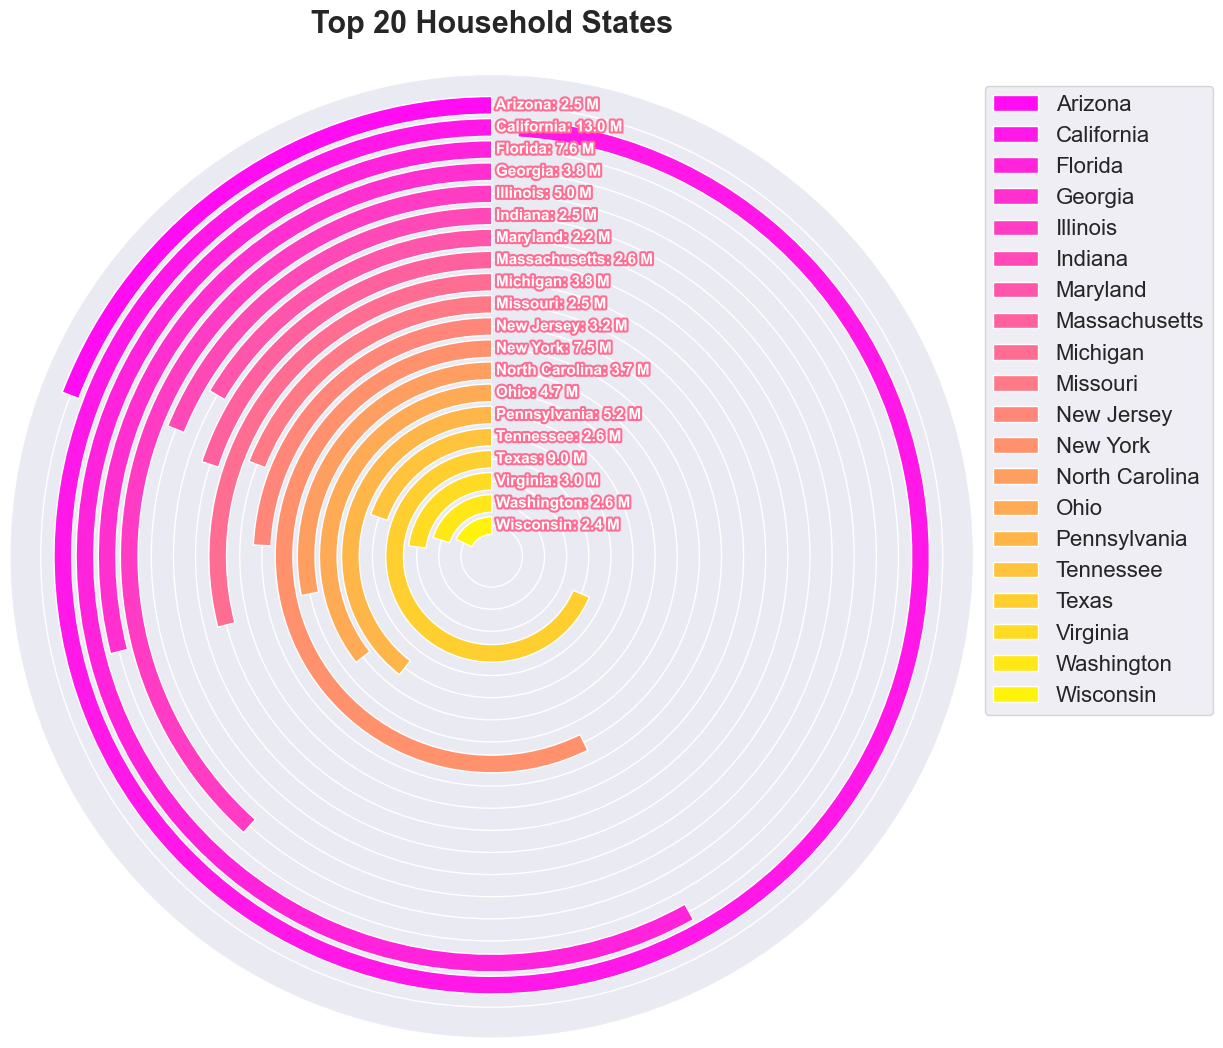

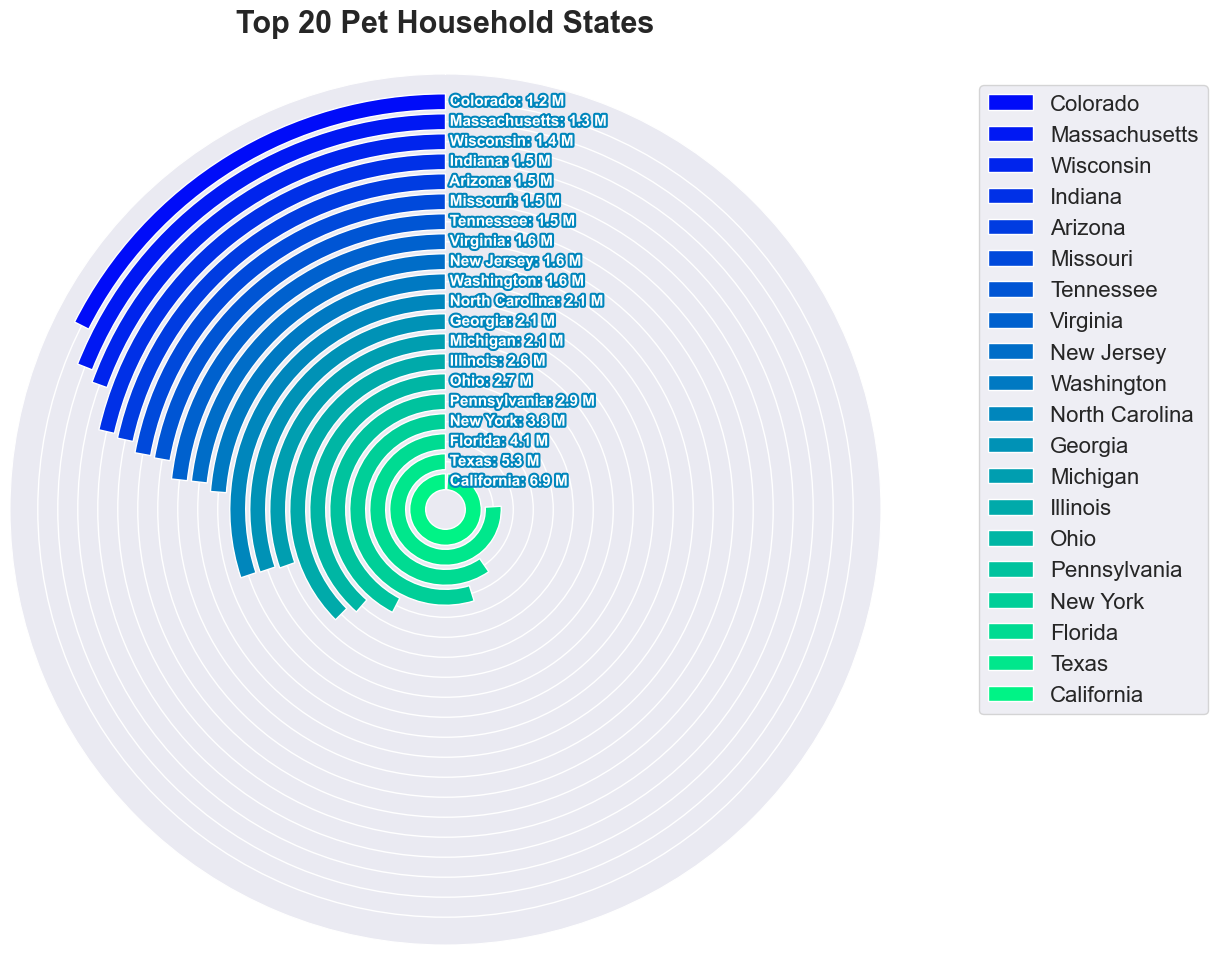

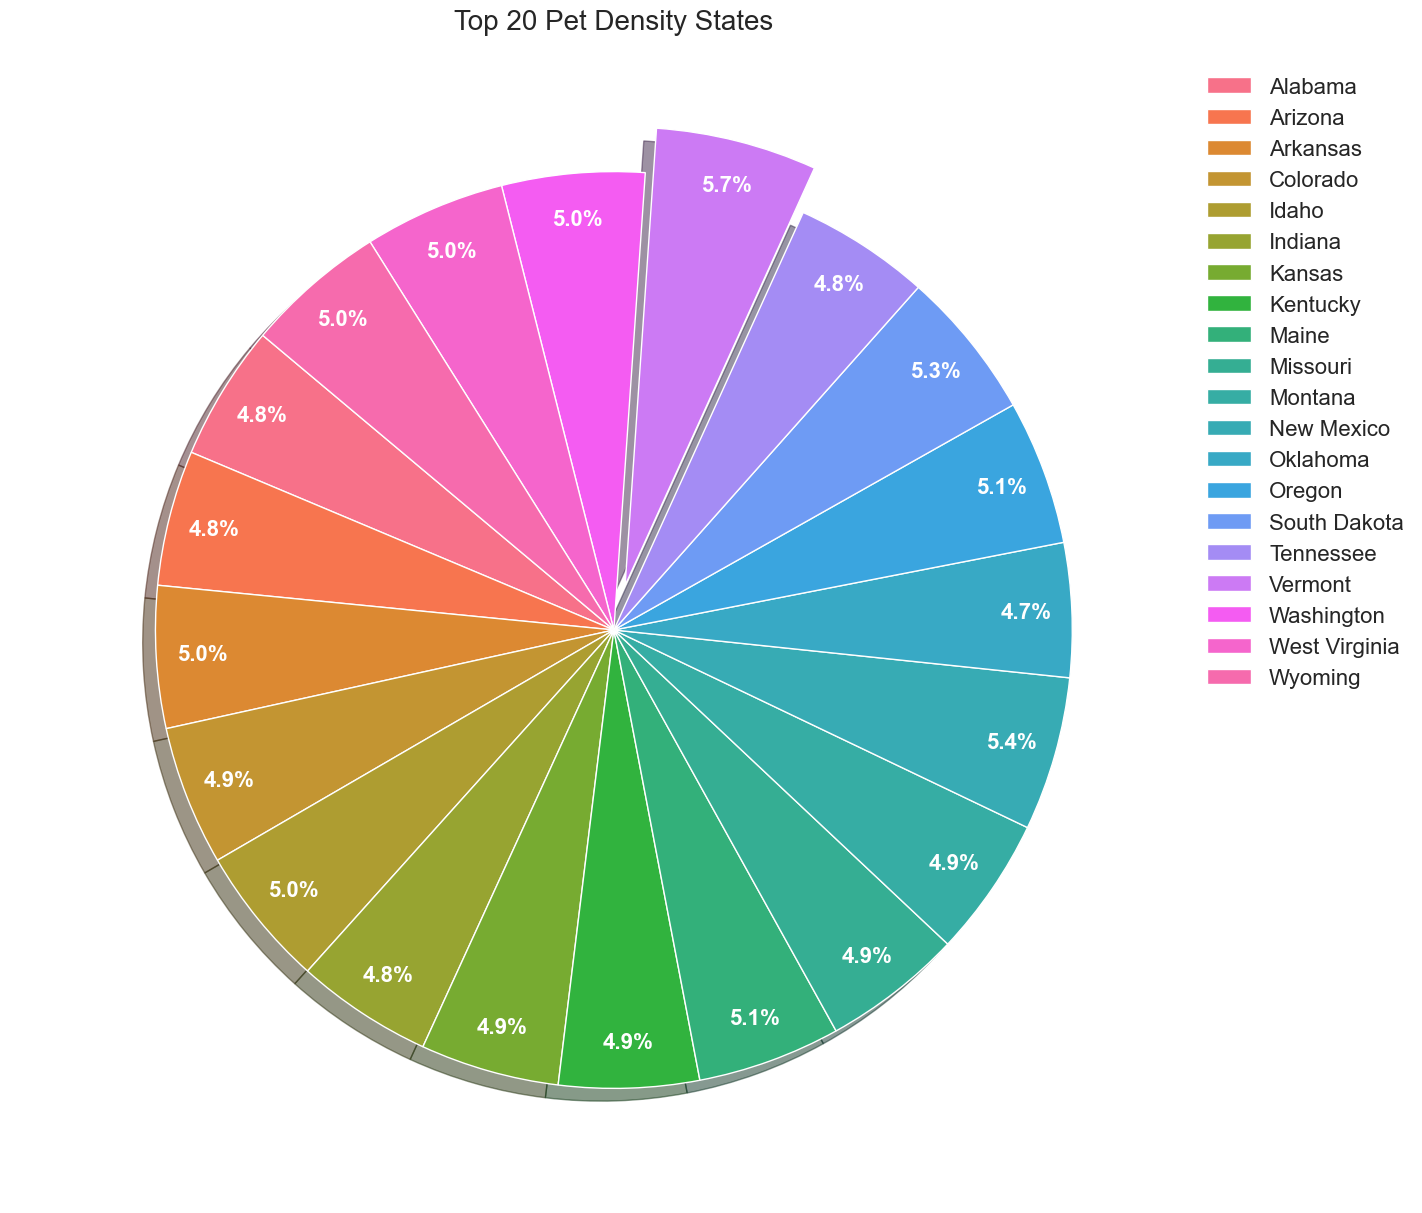

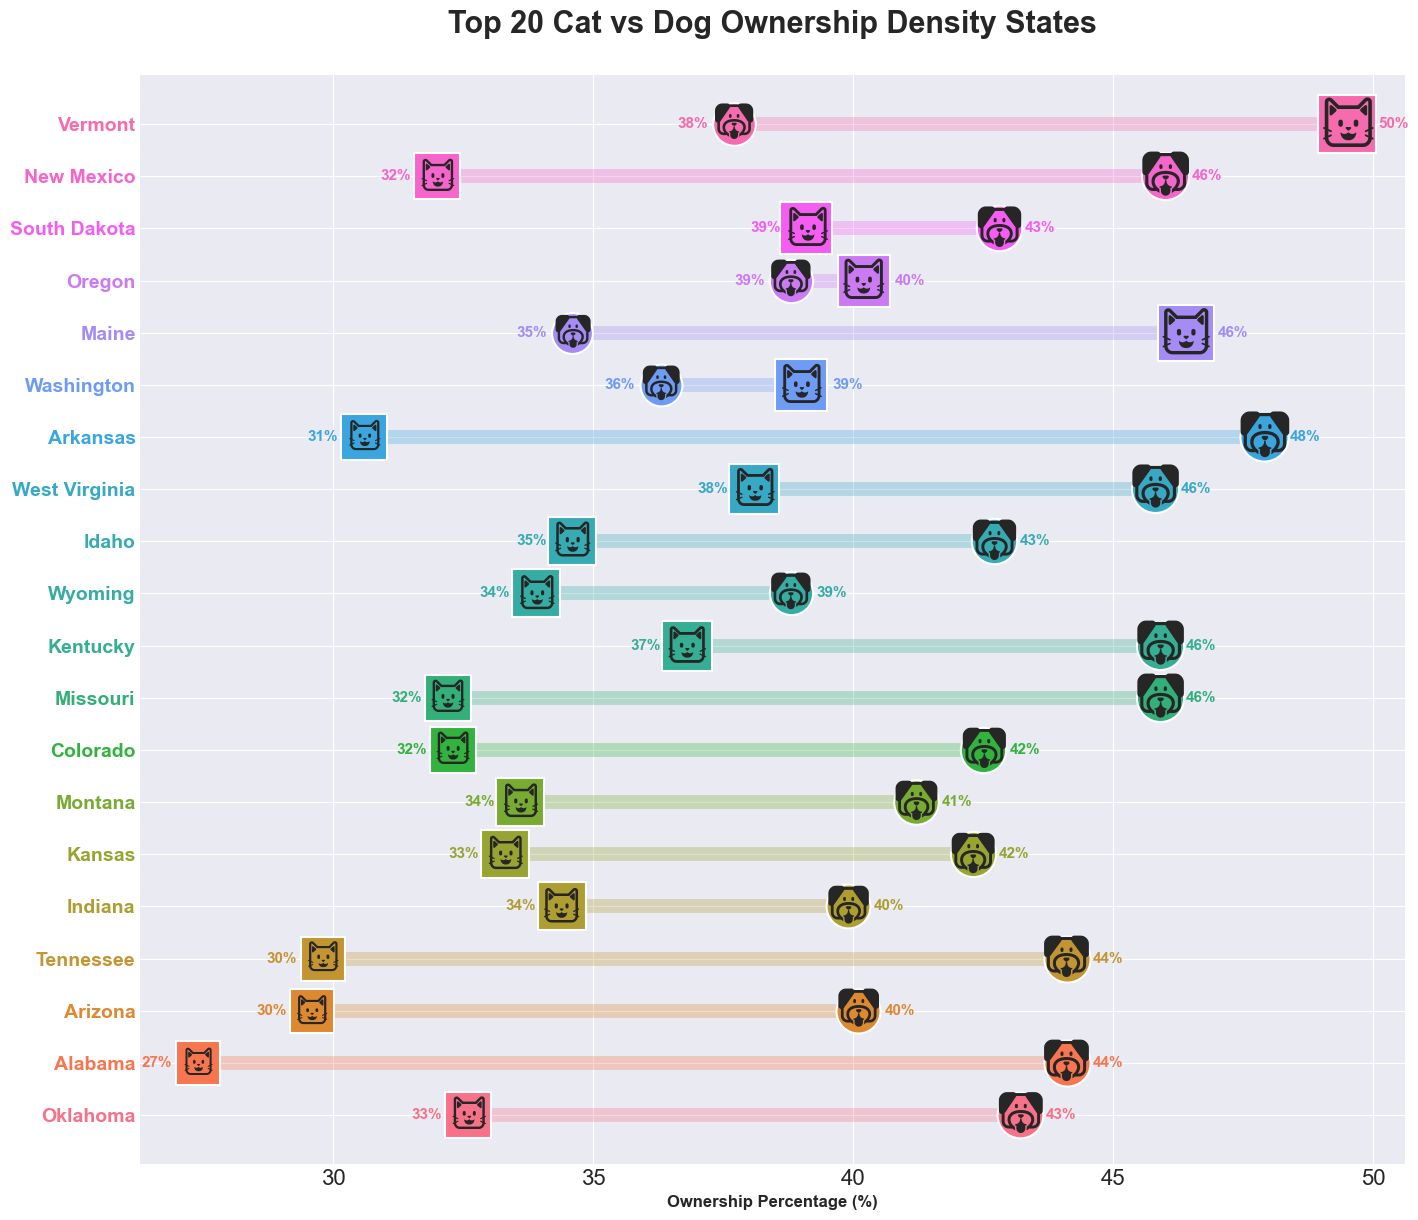

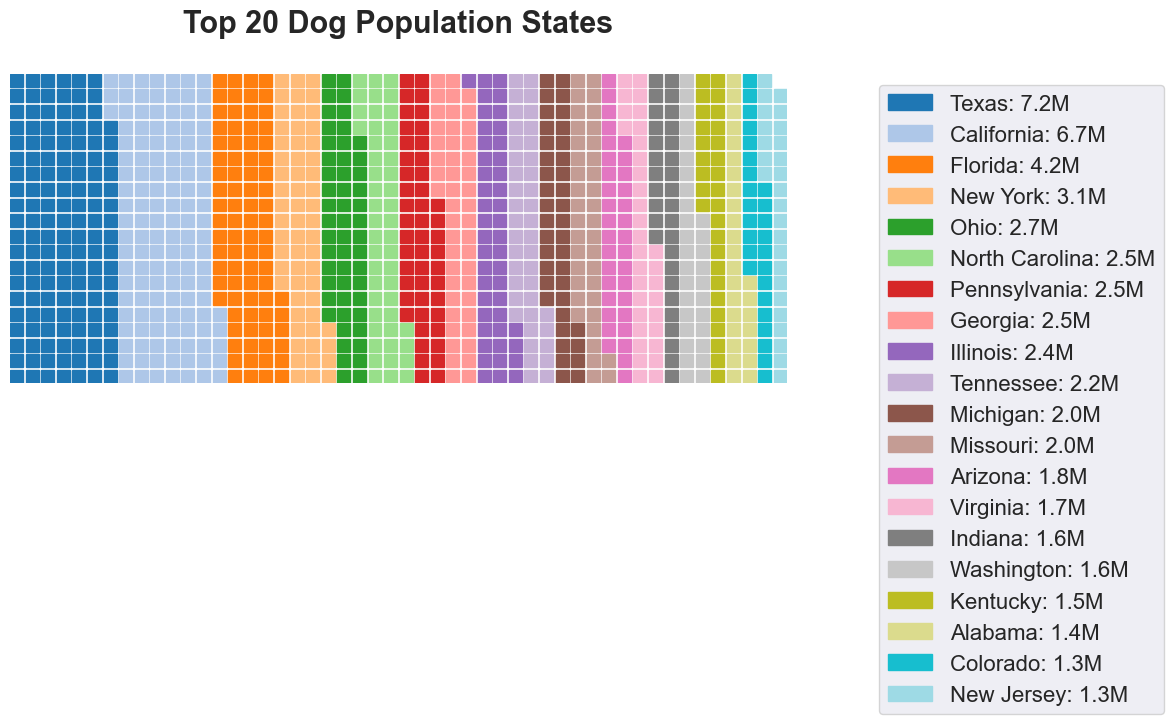

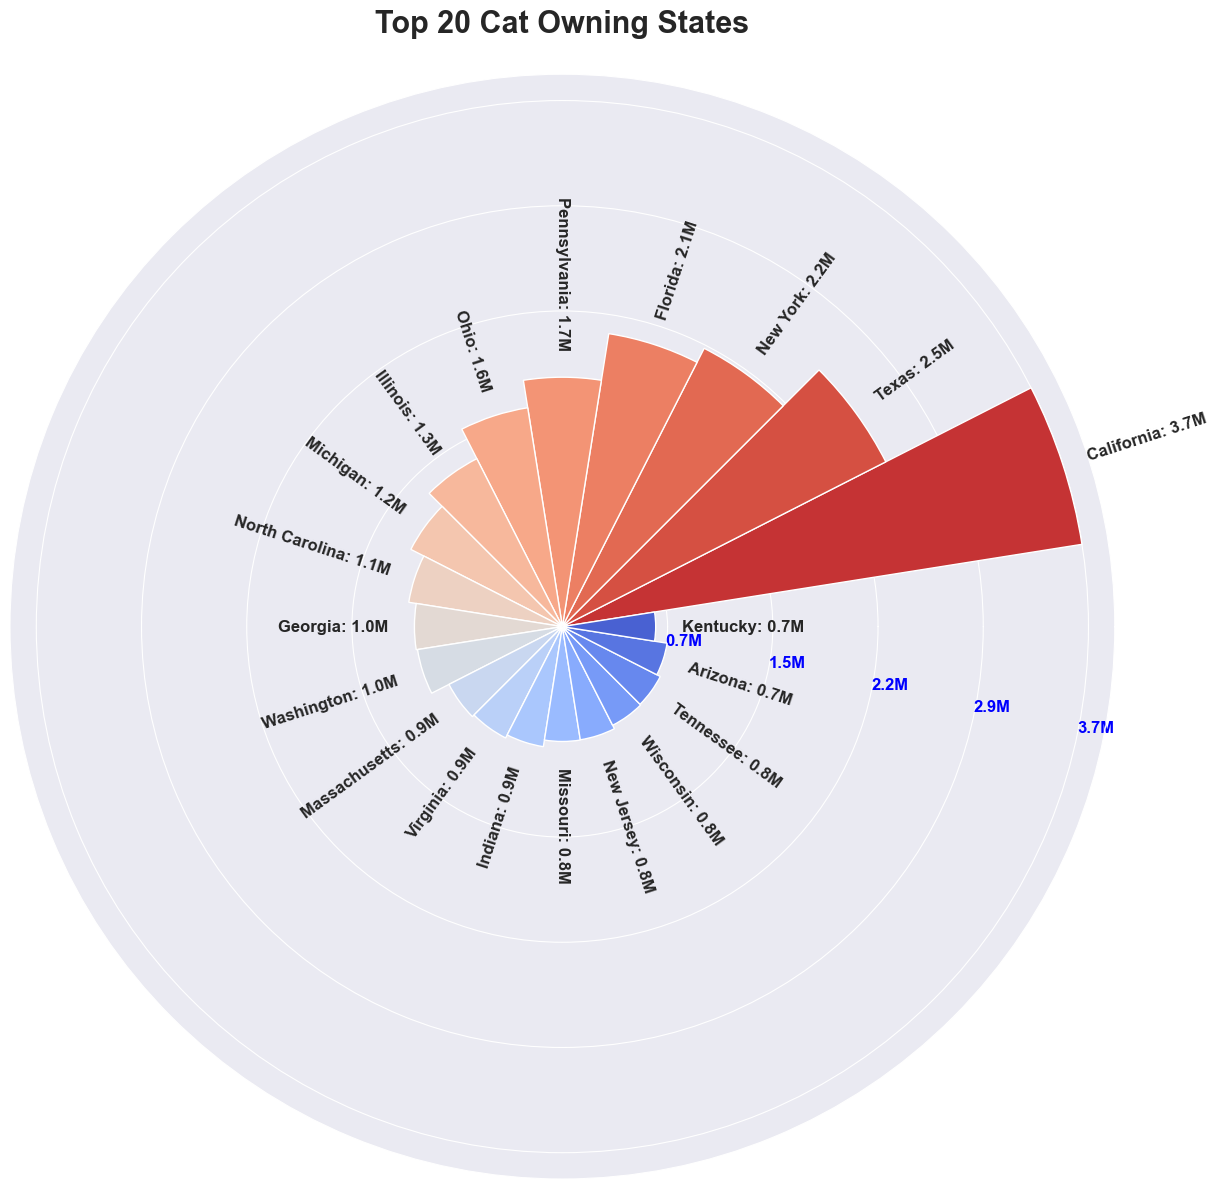

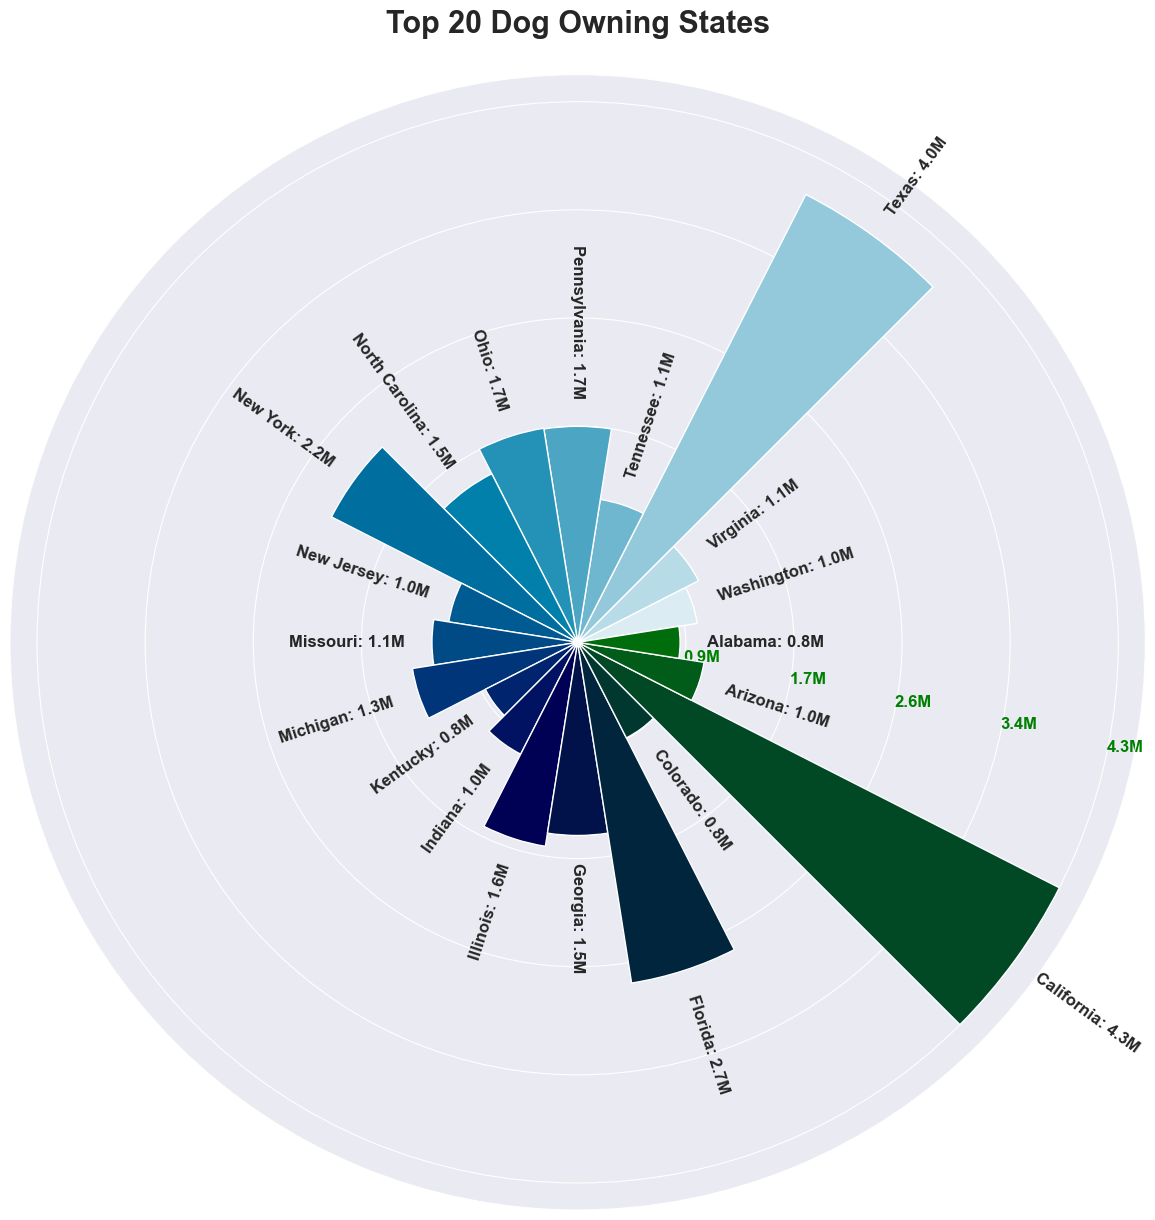

In [138]:
#Run dashboard
data_manager = DataManager()
dashboard_manager = DashboardManager(data_manager.data_frame)
dashboard_manager.show_dashboard()
#dashboard_manager.show_dashboard(servable=False) #opens dashboard in a new browser tab

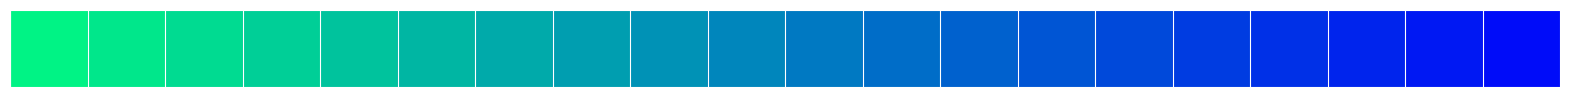

In [130]:
#palette = sns.color_palette("spring_r", 20)
palette = sns.color_palette("winter_r", 20)
sns.palplot(palette)
plt.show()